In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Linear regression with single feature
#  y=w*x+b


# setting up the random seed
np.random.seed(42)

# lets sample x
no_of_samples = 500
X = np.random.randn(no_of_samples)
noise = np.random.randn(no_of_samples) * 2
# real parameters
true_w = 5
true_b = 6
Y_true = true_w * X + true_b
Y = Y_true + noise

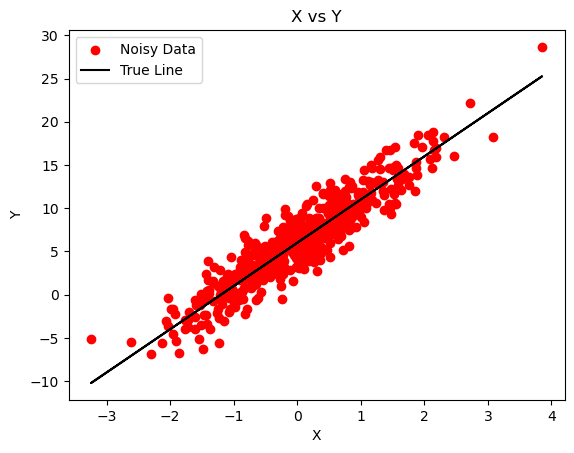

In [4]:
# lets plot the data and see.
plt.scatter(X, Y, c="red", label="Noisy Data")
plt.title("X vs Y")

plt.xlabel("X")
plt.ylabel("Y")

plt.plot(X, Y_true, c="black", label="True Line")

plt.legend()
plt.show()

In [5]:
# split the data randomly into train,dev,test sets

def split_data(X,Y,train=0.8):
    indices = np.arange(len(X))
    np.random.shuffle(indices)  
    
    train_split = int(train * len(X))
    train_idx, test_idx = indices[:train_split], indices[train_split:]
    
    X_train, Y_train = X[train_idx], Y[train_idx]
    X_test, Y_test = X[test_idx], Y[test_idx]
    return X_train, Y_train, X_test, Y_test

In [31]:
def initialize_parameters():
    np.random.seed(42)
    w=np.random.randn(1)
    b=np.zeros(1)
    return w,b    

# MSE Loss
def loss_fn(y_preds,y_true):
    return np.mean(np.square(y_preds-y_true))


#forward propagation
def forward_propagation(w,b,X):
    return (w*X)+b


# back_propagation(gradient descent)
def gradient_descent(X,Y,y_preds,w,b,learning_rate):
    dw=np.mean(X*(y_preds-Y))
    db=np.mean(y_preds-Y)
    w=w-learning_rate*dw
    b=b-learning_rate*db
    return w,b

In [32]:

def train(X,Y,learning_rate,loss_fn,epochs=1):
    w,b=initialize_parameters()
    losses=[]
    for i in range(epochs):
        y_preds=forward_propagation(w,b,X)
        losses.append(loss_fn(y_preds,Y))

        w,b=gradient_descent(X,Y,y_preds,w,b,learning_rate=learning_rate)
    return w,b,losses


    

(array([4.82615023]), array([5.97007776]))

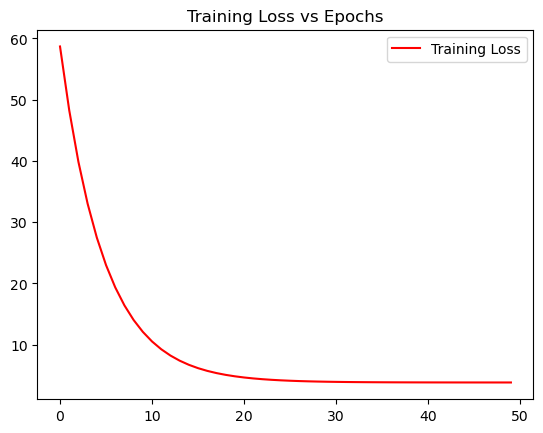

In [44]:
epochs=50
learning_rate=0.1
X_train,Y_train,X_test,Y_test=split_data(X,Y,train=0.8)
w,b,losses=train(X_train,Y_train,learning_rate=learning_rate,loss_fn=loss_fn,epochs=epochs)


plt.plot([i for i in range(epochs)],losses,c="red",label="Training Loss")
plt.title("Training Loss vs Epochs")
plt.legend()
plt.plot()

w,b